In [2]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')


In [3]:
# Importing all the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 90)

In [8]:
app_data = pd.read_csv("application_data.csv",encoding='latin1') #Reading data from local CSV

FileNotFoundError: [Errno 2] File b'application_data.csv' does not exist: b'application_data.csv'

In [6]:
app_data.head(10) #looking at 1st 5 rows to check if the data is correctly loaded and what kind of values are there in dataframe

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,...,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,...,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,...,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,NaN,0.650442,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,NaN,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,NaN,0.322738,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,"Spouse, partner",State servant,Se

In [22]:
app_data.shape

(307511, 122)

In [8]:
app_data.info

<bound method DataFrame.info of         SK_ID_CURR  ...  AMT_REQ_CREDIT_BUREAU_YEAR
0           100002  ...                         1.0
1           100003  ...                         0.0
2           100004  ...                         0.0
3           100006  ...                         NaN
4           100007  ...                         0.0
...            ...  ...                         ...
307506      456251  ...                         NaN
307507      456252  ...                         NaN
307508      456253  ...                         1.0
307509      456254  ...                         0.0
307510      456255  ...                         1.0

[307511 rows x 122 columns]>

**Quick stats on columns**

In [9]:
app_data.describe() 

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,...,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,...,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,...,0.149213,0.225897,0.231625,0.067169,0.101954,0.108607,0.008651,0.028236,0.102547,1.422245,0.143421,1.405292,0.100049,-962.858788,0.000042,0.710023,0.000081,0.015115,0.088055,0.000192,0.081376,0.003896,0.000023,0.003912,0.000007,0.003525,0.002936,0.00121,0.009928,0.000267,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,3522.886321,1509.450419,11.944812,0.001803,0.384280,0.399526,0.043164,0.449521,0.231307,0.910682,0.509034,0.502737,3.265832,0.122126,0.219526,0.197499,0.268444,0.421124,0.383817,0.211062,1.910602e-01,0.194844,0.10824,0.082438,0.059223,0.113280,0.076036,0.134576,0.100049,0.144641,...,0.100368,0.145067,0.161934,0.082167,0.093642,0.112260,0.047415,0.070166,0.107462,2.400989,0.446698,2.379803,0.362291,826.808487,0.006502,0.453752,0.009016,0.122010,0.283376,0.013850,0.273412,0.062295,0.004771,0.062424,0.002550,0.059268,0.054110,

**Null values across columns**

In [38]:
app_data.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

**Dimensions of dataset: Rows and Columns**

In [12]:
print("number of rows:",len(app_data))
print("number of columns:",len(app_data.columns))

number of rows: 307511
number of columns: 122


In [7]:
app_data1 = app_data.copy()
#creating a dataframe copy for further operations, so that if something goes wrong in any step we can reset without uploading data again.

# **Percentage missing values across all columns**

In [15]:
# Write your code for column-wise null count here

#counting and printing null values by column, 
print('null values by column\n',app_data1.isnull().sum(), "\n")

#storing them in a dataframe because we later need to calculate % nulls per column
app_data_columns = pd.DataFrame(app_data1.isnull().sum())

#renaming dataframe column for better interpretability
app_data_columns.rename(columns = {0:'missing_values'}, inplace = True) 

#converting indexs (column names) into a dataframe columns
missing_values_across_columns = app_data_columns.reset_index()

#renaming newly creating index column for better interpretability
missing_values_across_columns.rename(columns = {'index':'col_names'}, inplace = True) 
print(missing_values_across_columns.head(),"\n")

null values by column
 SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64 

            col_names  missing_values
0          SK_ID_CURR               0
1              TARGET               0
2  NAME_CONTRACT_TYPE               0
3         CODE_GENDER               0
4        FLAG_OWN_CAR               0 



**Storing missing values per column in a dataset "missing_values_across_columns"**

In [16]:
missing_values_across_columns['prcnt_missing_values'] = 0 #initializing a new column in dataframe with prcnt missing values
missing_values_across_columns['prcnt_missing_values'] = round(((missing_values_across_columns['missing_values'] / 307511)*100),2) #calculating percent missing values
missing_values_across_columns = missing_values_across_columns.sort_values(by=['prcnt_missing_values'] , ascending=False) #sorting in descending order
missing_values_across_columns.head(10) #missing_values_across_columns dataframe contains missing percent missing values across all columns

,col_names,missing_values,prcnt_missing_values
76,COMMONAREA_MEDI,214865,69.87
48,COMMONAREA_AVG,214865,69.87
62,COMMONAREA_MODE,214865,69.87
70,NONLIVINGAPARTMENTS_MODE,213514,69.43
56,NONLIVINGAPARTMENTS_AVG,213514,69.43
84,NONLIVINGAPARTMENTS_MEDI,213514,69.43
86,FONDKAPREMONT_MODE,210295,68.39
68,LIVINGAPARTMENTS_MODE,210199,68.35
54,LIVINGAPARTMENTS_AVG,210199,68.35
82,LIVINGAPARTMENTS_MEDI,210199,68.35


In [17]:
missing_values_across_columns_gt50 = missing_values_across_columns.copy()
missing_values_across_columns_gt50 = missing_values_across_columns_gt50.loc[missing_values_across_columns_gt50['prcnt_missing_values'] >= 50]
#missing_values_across_columns_gt50 is a dataframe which contains columnns having 50%+ missing values
print()

**Listing all the columns with 50%+ missing values**

In [38]:
columns_with_50prcnt_plus_missing_values =[] 
  
# Iterate over each row 
for index, rows in missing_values_across_columns_gt50.iterrows(): 
    # Create list for the current row 
    my_list =[rows.col_names] 
      
    # append the list to the final list 
    columns_with_50prcnt_plus_missing_values.append(my_list) 
  
# Print the list of columns with 50%+ missing values
print(columns_with_50prcnt_plus_missing_values) 

[['COMMONAREA_MEDI'], ['COMMONAREA_MODE'], ['COMMONAREA_AVG'], ['NONLIVINGAPARTMENTS_MODE'], ['NONLIVINGAPARTMENTS_MEDI'], ['NONLIVINGAPARTMENTS_AVG'], ['FONDKAPREMONT_MODE'], ['LIVINGAPARTMENTS_AVG'], ['LIVINGAPARTMENTS_MEDI'], ['LIVINGAPARTMENTS_MODE'], ['FLOORSMIN_AVG'], ['FLOORSMIN_MODE'], ['FLOORSMIN_MEDI'], ['YEARS_BUILD_MODE'], ['YEARS_BUILD_AVG'], ['YEARS_BUILD_MEDI'], ['OWN_CAR_AGE'], ['LANDAREA_MODE'], ['LANDAREA_AVG'], ['LANDAREA_MEDI'], ['BASEMENTAREA_MEDI'], ['BASEMENTAREA_AVG'], ['BASEMENTAREA_MODE'], ['EXT_SOURCE_1'], ['NONLIVINGAREA_MODE'], ['NONLIVINGAREA_AVG'], ['NONLIVINGAREA_MEDI'], ['ELEVATORS_AVG'], ['ELEVATORS_MODE'], ['ELEVATORS_MEDI'], ['WALLSMATERIAL_MODE'], ['APARTMENTS_MEDI'], ['APARTMENTS_AVG'], ['APARTMENTS_MODE'], ['ENTRANCES_MEDI'], ['ENTRANCES_AVG'], ['ENTRANCES_MODE'], ['LIVINGAREA_AVG'], ['LIVINGAREA_MODE'], ['LIVINGAREA_MEDI'], ['HOUSETYPE_MODE']]


In [18]:
print("Number of columns with missing values greater than 50% =", len(missing_values_across_columns_gt50))

Number of columns with missing values greater than 50% = 41


**Number of columns with missing values greater than 50% = 41**

# **Removing columns with 50%+ missing values**

In [8]:
#removing columns with 50%+ missing values
for i in app_data1:
    v = round(100*(app_data1[i].isnull().sum()/len(app_data1)),2)
    if v >= 50:
        app_data1.drop(i, axis=1, inplace=True)

In [20]:
print("Number of remaining columns post removing columns with 50%+ missing values = " , len(app_data1.columns))

#Note this number matches with our calculation above = 122-41 = 81 . thus an extra data validation check is passed

Number of remaining columns post removing columns with 50%+ missing values =  81


**Number of remaining columns post removing columns with 50%+ missing values =  81**

# **Imputing columns with less percentage of missing**

In [21]:
#top 15 columns with least number of missing values
missing_values_gt0_lt50 = missing_values_across_columns.copy()
missing_values_gt0_lt50 = missing_values_gt0_lt50.loc[(missing_values_gt0_lt50['prcnt_missing_values'] < 50) & (missing_values_gt0_lt50['prcnt_missing_values'] > 0)]
#missing_values_across_columns_gt50 is a dataframe which contains columnns having 50%+ missing values
missing_values_gt0_lt50 = missing_values_gt0_lt50.sort_values(by=['prcnt_missing_values'] , ascending=True)
print("TOP 15 COLUMNS WITH LEAST NUMBER OF MISSING VALUES")
missing_values_gt0_lt50.head(15)

TOP 15 COLUMNS WITH LEAST NUMBER OF MISSING VALUES


,col_names,missing_values,prcnt_missing_values
10,AMT_GOODS_PRICE,278,0.09
42,EXT_SOURCE_2,660,0.21
94,DEF_60_CNT_SOCIAL_CIRCLE,1021,0.33
93,OBS_60_CNT_SOCIAL_CIRCLE,1021,0.33
91,OBS_30_CNT_SOCIAL_CIRCLE,1021,0.33
92,DEF_30_CNT_SOCIAL_CIRCLE,1021,0.33
11,NAME_TYPE_SUITE,1292,0.42
121,AMT_REQ_CREDIT_BUREAU_YEAR,41519,13.50
120,AMT_REQ_CREDIT_BUREAU_QRT,41519,13.50
119,AMT_REQ_CREDIT_BUREAU_MON,41519,13.50


**Columns selected for imputation (Count = 7): "AMT_GOODS_PRICE","EXT_SOURCE_2","DEF_60_CNT_SOCIAL_CIRCLE","OBS_60_CNT_SOCIAL_CIRCLE","NAME_TYPE_SUITE","AMT_REQ_CREDIT_BUREAU_YEAR","OCCUPATION_TYPE"**

In [65]:
app_data1[["AMT_GOODS_PRICE","EXT_SOURCE_2","DEF_60_CNT_SOCIAL_CIRCLE","OBS_60_CNT_SOCIAL_CIRCLE","NAME_TYPE_SUITE","AMT_REQ_CREDIT_BUREAU_YEAR","OCCUPATION_TYPE"]].head(10)

,AMT_GOODS_PRICE,EXT_SOURCE_2,DEF_60_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,NAME_TYPE_SUITE,AMT_REQ_CREDIT_BUREAU_YEAR,OCCUPATION_TYPE
0,351000.0,0.262949,2.0,2.0,Unaccompanied,1.0,Laborers
1,1129500.0,0.622246,0.0,1.0,Family,0.0,Core staff
2,135000.0,0.555912,0.0,0.0,Unaccompanied,0.0,Laborers
3,297000.0,0.650442,0.0,2.0,Unaccompanied,NaN,Laborers
4,513000.0,0.322738,0.0,0.0,Unaccompanied,0.0,Core staff
5,454500.0,0.354225,0.0,0.0,"Spouse, partner",1.0,Laborers
6,1395000.0,0.724000,0.0,1.0,Unaccompanied,2.0,Accountants
7,1530000.0,0.714279,0.0,2.0,Unaccompanied,0.0,Managers
8,913500.0,0.205747,0.0,1.0,Children,1.0,NaN
9,405000.0,0.746644,0.0,2.0,Unaccompanied,NaN,Laborers


**Given, imputation strategy differ for continuous vs. categorical columns,identifying categorical versus continuos columns based on number of unique values and business logic**

Note: For the columns selected for imputation, assuming a variable to be 'categorical' if number of unique values < 30, and for columns with unique values > 1000 are considered a 'continuous'.

In [28]:
app_data1[["AMT_GOODS_PRICE","EXT_SOURCE_2","DEF_60_CNT_SOCIAL_CIRCLE","OBS_60_CNT_SOCIAL_CIRCLE","NAME_TYPE_SUITE","AMT_REQ_CREDIT_BUREAU_YEAR","OCCUPATION_TYPE"]].nunique()

AMT_GOODS_PRICE                 1002
EXT_SOURCE_2                  119831
DEF_60_CNT_SOCIAL_CIRCLE           9
OBS_60_CNT_SOCIAL_CIRCLE          33
NAME_TYPE_SUITE                    7
AMT_REQ_CREDIT_BUREAU_YEAR        25
OCCUPATION_TYPE                   18
dtype: int64

**Numerical columns: 'AMT_GOODS_PRICE' , 'EXT_SOURCE_2'**

**Categorical columns: DEF_60_CNT_SOCIAL_CIRCLE , OBS_60_CNT_SOCIAL_CIRCLE , NAME_TYPE_SUITE, AMT_REQ_CREDIT_BUREAU_YEAR, OCCUPATION_TYPE**

#**Datatype issues in columns to be imputed**
**Categorical columns DEF_60_CNT_SOCIAL_CIRCLE , OBS_60_CNT_SOCIAL_CIRCLE , AMT_REQ_CREDIT_BUREAU_YEAR are identified as float64**


In [32]:
app_data1[["NAME_TYPE_SUITE","OCCUPATION_TYPE","DEF_60_CNT_SOCIAL_CIRCLE","OBS_60_CNT_SOCIAL_CIRCLE","AMT_REQ_CREDIT_BUREAU_YEAR"]].dtypes

NAME_TYPE_SUITE                object
OCCUPATION_TYPE                object
DEF_60_CNT_SOCIAL_CIRCLE      float64
OBS_60_CNT_SOCIAL_CIRCLE      float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
dtype: object

**Stats about categorical columns to determine value for imputation**

Note: Converting columns to 'categorical' before applying describe function, as some of them (mentioned above) are identified as float columns.

In [33]:
app_data1[["NAME_TYPE_SUITE","OCCUPATION_TYPE","DEF_60_CNT_SOCIAL_CIRCLE","OBS_60_CNT_SOCIAL_CIRCLE","AMT_REQ_CREDIT_BUREAU_YEAR"]].astype(object).describe()

,NAME_TYPE_SUITE,OCCUPATION_TYPE,DEF_60_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_YEAR
count,306219,211120,306490.0,306490.0,265992.0
unique,7,18,9.0,33.0,25.0
top,Unaccompanied,Laborers,0.0,0.0,0.0
freq,248526,55186,280721.0,164666.0,71801.0


# **Imputation strategy being suggested for categorical columns: Most frequent value**

*   Column name: NAME_TYPE_SUITE
*   Imputated by value: 'Unaccompanied'

Insight: Frequency of occurence for 'Unaccompanied' value > 81%. Given, high frequency this imputation is safe.

---------------------------------------   
*   Column name: 'OCCUPATION_TYPE'
*   Imputated by value: 'Laborers'

Insight: Frequency of occurence for 'Laborers' value < 30%. Imputing with such infrequent class can have negative impact on prediction capabilities of data. Also, in terms of economics, credit worthiness of a person in labor class would be lower, thus we should consider an alternative strategy for imputing missing values in 'OCCUPATION_TYPE' column, otherwise our model will be biased towards rejecting loans for applicants with missing 'OCCUPATION_TYPE'. Thus we should use an alternative strategy given in next cell.

--------------------------------------
*   Column name: 'DEF_60_CNT_SOCIAL_CIRCLE'
*   Imputated by value: 0

Column definition: How many observation of client's social surroundings defaulted in 60 DPD (day past due).

Insight: Frequency of occurence of 0 for this column > 91%. Given, high frequency this imputation is safe.

--------------------------------------

*   Column name: 'OBS_60_CNT_SOCIAL_CIRCLE'
*   Imputated by value: 0

Column definition: How many observation of client's social surroundings with observable 60 DPD

Insight: Frequency of occurence of 0 for this column > 53%. Given, high frequency this imputation is safe.

--------------------------------------

*   Column name: 'AMT_REQ_CREDIT_BUREAU_YEAR'
*   Imputated by value: 0

Column definition: How many observation of client's social surroundings with observable 60 DPD

Insight: Frequency of occurence of 0 for this column = 27%. Given, low frequency this imputation is unsafe and we should use an alternative imputation strategy given below.

# **Alternative imputation strategy for categorical columns, insights:**

*  Creating an out of vocabulary or 'unknown' label and using it imputation.
*  Using a model (regression, nearest neighbor) to predict value. For example, a laborer might just have a secondary education and live in a location with low real estate cost versus a 'state servant' or 'commercial worker' having higher education. Thus using relations between columns we can more accurately predict missing values and impute them accurately.

We should experiment with both imputation strategies and use the one which gives better performance.





**Stats about continuous columns to determine value for imputation**

In [34]:
app_data1[["EXT_SOURCE_2", "AMT_GOODS_PRICE"]].describe().apply(lambda s: s.apply(lambda x: format(x, 'g')))

#.apply(lambda s: s.apply(lambda x: format(x, 'g'))) is used to supress scientific notations in output

,EXT_SOURCE_2,AMT_GOODS_PRICE
count,306851,307233
mean,0.514393,538396
std,0.19106,369446
min,8.17362e-08,40500
25%,0.392457,238500
50%,0.565961,450000
75%,0.663617,679500
max,0.855,4.05e+06


# **Imputation strategies for continuous columns**

*   Column name: 'EXT_SOURCE_2'
*   Imputated by value: 0.514
*   Imputation strategy: Replace missing values by column 'mean'
*   Column definition: Normalized score from external data source

Insight: Given mean is roughly equal to median, the column doesn't have significant number of outliers. In such case we can use mean value for imputation. Alternative imputation strategies for continuous variables are advised in next cell.


----------------------------------------------------------------------------

*   Column name: 'AMT_GOODS_PRICE'
*   Imputated by value: 450000
*   Imputation strategy: Replace missing values by column 'median'
*   Column definition: For consumer loans it is the price of the goods for which the loan is given

Insight: Given mean significantly greater than median, the column has significant number of outliers in higher values. In such case we should use median value for imputation. Alternative imputation strategies for continuous variables are advised in next cell.




# **Alternative imputation strategy for numerical columns:**

Impute missing values with a predicted value based on values from other columns. For example, for column 'AMT_GOODS_PRICE' and "EXT_SOURCE_2" replace missing values based on median of different "occupation_type".

# **Data type check**

In [10]:
pd.set_option('display.max_rows', 90)

In [76]:
data_types = pd.DataFrame(app_data1.dtypes)
data_types = data_types.reset_index()
data_types.columns =['col_name', 'default_dtype'] 
data_types.head()

,col_name,default_dtype
0,SK_ID_CURR,int64
1,TARGET,int64
2,NAME_CONTRACT_TYPE,object
3,CODE_GENDER,object
4,FLAG_OWN_CAR,object


In [86]:
unique_values = pd.DataFrame(app_data1.nunique())
unique_values = unique_values.reset_index()
unique_values.columns =['col_name', 'unique_values']
unique_values["suggested_dtype"] = "categorical: object"
unique_values["suggested_dtype"].loc[unique_values["unique_values"]>300] = "continuos: int/float"
unique_values.head()

,col_name,unique_values,suggested_dtype
0,SK_ID_CURR,307511,continuos: int/float
1,TARGET,2,categorical: object
2,NAME_CONTRACT_TYPE,2,categorical: object
3,CODE_GENDER,3,categorical: object
4,FLAG_OWN_CAR,2,categorical: object


In [88]:
dtype_check = data_types.merge(unique_values, on='col_name')
dtype_check.head(85)

,col_name,default_dtype,unique_values,suggested_dtype
0,SK_ID_CURR,int64,307511,continuos: int/float
1,TARGET,int64,2,categorical: object
2,NAME_CONTRACT_TYPE,object,2,categorical: object
3,CODE_GENDER,object,3,categorical: object
4,FLAG_OWN_CAR,object,2,categorical: object
5,FLAG_OWN_REALTY,object,2,categorical: object
6,CNT_CHILDREN,int64,15,categorical: object
7,AMT_INCOME_TOTAL,float64,2548,continuos: int/float
8,AMT_CREDIT,float64,5603,continuos: int/float
9,AMT_ANNUITY,float64,13672,continuos: int/float


# **Datatype issues detected**

**Categorical (object) columns detected as continuous (int64/float) while data loading:** TARGET, CNT_CHILDREN, FLAG_MOBIL , FLAG_EMP_PHONE, FLAG_WORK_PHONE , FLAG_CONT_MOBILE , FLAG_PHONE , FLAG_EMAIL , CNT_FAM_MEMBERS , REGION_RATING_CLIENT , REGION_RATING_CLIENT_W_CITY , WEEKDAY_APPR_PROCESS_START , REG_REGION_NOT_LIVE_REGION , REG_REGION_NOT_WORK_REGION , LIVE_REGION_NOT_WORK_REGION , REG_CITY_NOT_LIVE_CITY , REG_CITY_NOT_WORK_CITY , LIVE_CITY_NOT_WORK_CITY , FLAG_DOCUMENT_2 , FLAG_DOCUMENT_3 , FLAG_DOCUMENT_4 , FLAG_DOCUMENT_5 , FLAG_DOCUMENT_6 , FLAG_DOCUMENT_7 , FLAG_DOCUMENT_8 , FLAG_DOCUMENT_9 , FLAG_DOCUMENT_10 , FLAG_DOCUMENT_11 , FLAG_DOCUMENT_12 , FLAG_DOCUMENT_13 , FLAG_DOCUMENT_14 , FLAG_DOCUMENT_15 , FLAG_DOCUMENT_16 , FLAG_DOCUMENT_17 , FLAG_DOCUMENT_18 , FLAG_DOCUMENT_19 , FLAG_DOCUMENT_20 , FLAG_DOCUMENT_21


# **Fixing data type issues based on above detected issues**

In [11]:
app_data2 = app_data1.copy()
columns_to_be_changed_to_categorical = ["FLAG_MOBIL","FLAG_EMP_PHONE","FLAG_WORK_PHONE","FLAG_CONT_MOBILE","FLAG_PHONE","FLAG_EMAIL","CNT_FAM_MEMBERS","REGION_RATING_CLIENT","REGION_RATING_CLIENT_W_CITY","WEEKDAY_APPR_PROCESS_START","REG_REGION_NOT_LIVE_REGION","REG_REGION_NOT_WORK_REGION","LIVE_REGION_NOT_WORK_REGION","REG_CITY_NOT_LIVE_CITY","REG_CITY_NOT_WORK_CITY","LIVE_CITY_NOT_WORK_CITY","FLAG_DOCUMENT_2","FLAG_DOCUMENT_3","FLAG_DOCUMENT_4","FLAG_DOCUMENT_5","FLAG_DOCUMENT_6","FLAG_DOCUMENT_7","FLAG_DOCUMENT_8","FLAG_DOCUMENT_9","FLAG_DOCUMENT_10","FLAG_DOCUMENT_11","FLAG_DOCUMENT_12","FLAG_DOCUMENT_13","FLAG_DOCUMENT_14","FLAG_DOCUMENT_15","FLAG_DOCUMENT_16","FLAG_DOCUMENT_17","FLAG_DOCUMENT_18","FLAG_DOCUMENT_19","FLAG_DOCUMENT_20","FLAG_DOCUMENT_21"]
app_data2[columns_to_be_changed_to_categorical] = app_data2[columns_to_be_changed_to_categorical].astype(object)
app_data2.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
FLAG_MOBIL                       object
FLAG_EMP_PHONE                   object
FLAG_WORK_PHONE                  object
FLAG_CONT_MOBILE                 object


**Assesing type of data (values) across columns for identification of data issues**

In [95]:
app_data2.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,HOUR_APPR_PROCESS_START,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,3.068510e+05,246546.000000,157504.000000,154491.000000,157504.000000,154491.000000,157504.000000,154491.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.063419,5.143927e-01,0.510853,0.977735,0.226282,0.977065,0.222315,0.977752,0.225897,0.102547,1.422245,0.143421,1.405292,0.100049,-962.858788,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,3522.886321,1509.450419,3.265832,1.910602e-01,0.194844,0.059223,0.144641,0.064575,0.143709,0.059897,0.145067,0.107462,2.400989,0.446698,2.379803,0.362291,826.808487,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,-24672.000000,-7197.000000,0.000000,8.173617e-08,0.000527,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4292.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,-7479.500000,-4299.000000,10.000000,3.924574e-01,0.370650,0.976700,0.166700,0.976700,0.166700,0.976700,0.166700,0.041200,0.000000,0.000000,0.000000,0.000000,-1570.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,-4504.000000,-3254.000000,12.000000,5.659614e-01,0.535276,0.981600,0.166700,0.981600,0.166700,0.981600,0.166700,0.068800,0.000000,0.000000,0.000000,0.000000,-757.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,-2010.000000,-1720.000000,14.000000,6.636171e-01,0.669057,0.986600,0.333300,0.986600,0.333300,0.986600,0.333300,0.127600,2.000000,0.000000,2.000000,0.000000,-274.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,0.000000,0.000000,23.000000,8.549997e-01,0.896010,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,348.000000,34.000000,344.000000,24.000000,0.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


**Columns with Data issues, wrong type of data:** "DAYS_BIRTH" , "DAYS_EMPLOYED" , "DAYS_REGISTRATION" , "DAYS_ID_PUBLISH"

**Data issue:** Negative values for days/time is not possible.

**Solution:** Replace columns with the absolute values, thus converting negative age/days into positive

**Replacing columns with wrong data value/type with absolute values, thus converting negative age/days into positive**

In [12]:
app_data2[["DAYS_BIRTH","DAYS_EMPLOYED","DAYS_REGISTRATION","DAYS_ID_PUBLISH"]] = app_data2[["DAYS_BIRTH","DAYS_EMPLOYED","DAYS_REGISTRATION","DAYS_ID_PUBLISH"]].abs()
app_data2.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,HOUR_APPR_PROCESS_START,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,3.068510e+05,246546.000000,157504.000000,154491.000000,157504.000000,154491.000000,157504.000000,154491.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,16036.995067,67724.742149,4986.120328,2994.202373,12.063419,5.143927e-01,0.510853,0.977735,0.226282,0.977065,0.222315,0.977752,0.225897,0.102547,1.422245,0.143421,1.405292,0.100049,-962.858788,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,139443.751806,3522.886321,1509.450419,3.265832,1.910602e-01,0.194844,0.059223,0.144641,0.064575,0.143709,0.059897,0.145067,0.107462,2.400989,0.446698,2.379803,0.362291,826.808487,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,7489.000000,0.000000,0.000000,0.000000,0.000000,8.173617e-08,0.000527,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4292.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,12413.000000,933.000000,2010.000000,1720.000000,10.000000,3.924574e-01,0.370650,0.976700,0.166700,0.976700,0.166700,0.976700,0.166700,0.041200,0.000000,0.000000,0.000000,0.000000,-1570.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,15750.000000,2219.000000,4504.000000,3254.000000,12.000000,5.659614e-01,0.535276,0.981600,0.166700,0.981600,0.166700,0.981600,0.166700,0.068800,0.000000,0.000000,0.000000,0.000000,-757.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,19682.000000,5707.000000,7479.500000,4299.000000,14.000000,6.636171e-01,0.669057,0.986600,0.333300,0.986600,0.333300,0.986600,0.333300,0.127600,2.000000,0.000000,2.000000,0.000000,-274.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,25229.000000,365243.000000,24672.000000,7197.000000,23.000000,8.549997e-01,0.896010,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,348.000000,34.000000,344.000000,24.000000,0.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


**There is no date column in application_data.csv, neither there is any reference date for columns i.e. date of application**

However, all time based columns are relative to date of application. Thus in order to convert/add a pandas date column we need to assume application date (say as today). Thus we would be adding a new column as date_of_birth assuming date of application for all applicants as today (now), this is just to perform date conversion demonstration.

# **Extracting date of birth of loan applicant in Pandas date format based on "DAYS_BIRTH" column**

In [113]:
import datetime 
from datetime import timedelta
today = datetime.datetime.now()
app_data2["date_of_birth"] = today

app_data2["date_of_birth"] = app_data2["date_of_birth"] - pd.to_timedelta(app_data2["DAYS_BIRTH"], unit='D')
app_data2["date_of_birth"].head(10)


0   1994-07-27 19:46:23.842815
1   1974-07-28 19:46:23.842815
2   1968-04-29 19:46:23.842815
3   1968-06-09 19:46:23.842815
4   1965-11-25 19:46:23.842815
5   1974-02-02 19:46:23.842815
6   1982-10-01 19:46:23.842815
7   1968-11-11 19:46:23.842815
8   1965-06-11 19:46:23.842815
9   1980-11-09 19:46:23.842815
Name: date_of_birth, dtype: datetime64[ns]

# **Outlier detection for numeric columns**

**We will be using following 2 techniques for detection of outliers:**

*   Concepts from normal distribution: Outliers = points beyond +/- 3 sigma (std)
*   Box plots



In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
df_application_data = app_data2[["AMT_INCOME_TOTAL","AMT_CREDIT","AMT_ANNUITY","AMT_GOODS_PRICE","DAYS_BIRTH","DAYS_EMPLOYED","DAYS_REGISTRATION","DAYS_ID_PUBLISH"]].copy()

**Analysing mean, median and standard deviation of numeric columns for outlier detection**

In [138]:
df_application_data.describe().apply(lambda s: s.apply(lambda x: format(x, 'g')))

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH
count,307511,307511,307499,307233,307511,307511,307511,307511
mean,168798,599026,27108.6,538396,16037,67724.7,4986.12,2994.2
std,237123,402491,14493.7,369446,4363.99,139444,3522.89,1509.45
min,25650,45000,1615.5,40500,7489,0,0,0
25%,112500,270000,16524,238500,12413,933,2010,1720
50%,147150,513531,24903,450000,15750,2219,4504,3254
75%,202500,808650,34596,679500,19682,5707,7479.5,4299
max,1.17e+08,4.05e+06,258026,4.05e+06,25229,365243,24672,7197


# **Column wise outlier insights:** (based on normal distribution)

**Note: Since we are analysing data with potential outliers we would be using median for our normal distribution analysis**


-----------------------------------------------------------------------------

**Column: AMT_INCOME_TOTAL**
*   Median: 147150 , Standard deviation: 237123
*   Median +3 standard deviation: 858519
*   Median -3 standard deviation: Imputed to 0, as it cannot be negative
*   Outlier insights: Given standard deviation is significantly greater than median, it points towards presence of large number of outliers for this column. Also, max value of 117000000 is significantly larger than median+3sigma boundary of 858519, thus **confirming outliers** for this column. We would visualise the same with box plots.


-----------------------------------------------------------------------------

**Column: AMT_CREDIT**
*   Median: 513531, Standard deviation: 402491
*   Median +3 standard deviation: 1721004
*   Median -3 standard deviation: Imputed to 0, as it cannot be negative
*   Outlier insights: Given standard deviation is roughly equal to median, it points towards presence of large number of outliers for this column. Also, max value of 4050000 is significantly larger than median+3sigma boundary of 1721004, thus **confirming outliers** for this column. We would visualise the same with box plots.

-----------------------------------------------------------------------------

**Column: AMT_ANNUITY**
*   Median: 24903, Standard deviation: 14493.7
*   Median +3 standard deviation: 68384
*   Median -3 standard deviation: Imputed to 0, as it cannot be negative
*   Outlier insights: A large standard deviation points towards presence of significant number of outliers for this column. Also, max value of 258026 is significantly larger than median+3sigma boundary of 68384,thus **confirming outliers** for this column. We would visualise the same with box plots.

-----------------------------------------------------------------------------

**Column: AMT_GOODS_PRICE**
*   Median: 450000, Standard deviation: 369446
*   Median +3 standard deviation: 1558338
*   Median -3 standard deviation: Imputed to 0, as it cannot be negative
*   Outlier insights: A large standard deviation points towards presence of significant number of outliers for this column. Also, max value of 4050000 is significantly larger than median+3sigma boundary of 1558338,thus **confirming outliers** for this column. We would visualise the same with box plots.

-----------------------------------------------------------------------------

**Column: DAYS_BIRTH**
*   Median: 15750, Standard deviation: 4363.99
*   Median +3 standard deviation: 24478
*   Median -3 standard deviation: 7022.02
*   Outlier insights: Standard deviation relatively smaller to median points towards column not containing outliers. Also, max value of 25229 is very close to the median+3sigma boundary of 24478,thus **confirming absence of outliers** for this column. We would visualise the same with box plots.

-----------------------------------------------------------------------------

**Column: DAYS_EMPLOYED**
*   Median: 2219, Standard deviation: 139444
*   Median +3 standard deviation: 420551
*   Median -3 standard deviation: Imputed to 0, as it cannot be negative
*   Outlier insights: A standard deviation which is significantly larger than median points towards column having **large number of outliers**. This can also be confirmed by the large difference between median and mean (67724.7), given mean is significantly larger than median, the outliers are towards the larger values (beyong 3 sigma standard deviation). We would visualise the same with box plots.


-----------------------------------------------------------------------------

**Column: DAYS_REGISTRATION**
*   Median: 4504, Standard deviation: 3522.89
*   Median +3 standard deviation: 15073
*   Median -3 standard deviation: Imputed to 0, as it cannot be negative
*   Outlier insights: A standard deviation comparable to median points towards column having significant number of outliers. Also, max value of 24672 is significantly larger than median+3sigma boundary of 15073,thus **confirming absence of outliers** for this column. We would visualise the same with box plots.

-----------------------------------------------------------------------------

**Column: DAYS_ID_PUBLISH**
*   Median: 3254, Standard deviation: 1509.45
*   Median +3 standard deviation: 7782
*   Median -3 standard deviation: Imputed to 0, as it cannot be negative
*   Outlier insights: A standard deviation comparable to median points towards column having significant number of outliers. Also, max value of 7197 is less than median+3sigma boundary of 7782,thus **confirming absence of outliers** for this column. We would visualise the same with box plots.

# **Column wise outlier insights:** (based on Box Plots)

**Outlier insights**

*   Column name: "AMT_CREDIT"
*   Insight: The black circles (data points) beyond (Upper quartile + 1.5 * Inter-quartile-range are outliers)

*   Column name: "AMT_GOODS_PRICE"
*   Insight: The black circles (data points) beyond (Upper quartile + 1.5 * Inter-quartile-range are outliers)



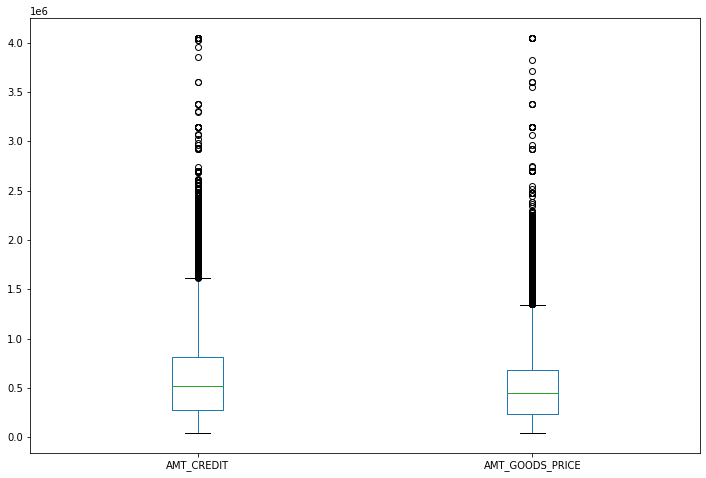

In [157]:
df_application_data = app_data2[["AMT_CREDIT","AMT_GOODS_PRICE"]].copy()
df_application_data.plot(kind='box', figsize=(12,8))
plt.show()

**Outlier insights**

*   Column name: "DAYS_BIRTH"
*   Insight: Given there are no data points beyond (Upper quartile + 1.5 * Inter-quartile-range are outliers), thus this column doesn't have outliers

*   Column name: "DAYS_REGISTRATION"
*   Insight: The black circles (data points) beyond (Upper quartile + 1.5 * Inter-quartile-range are outliers)

*   Column name: "DAYS_ID_PUBLISH"
*   Insight: Given there are no data points beyond (Upper quartile + 1.5 * Inter-quartile-range are outliers), thus this column doesn't have outliers

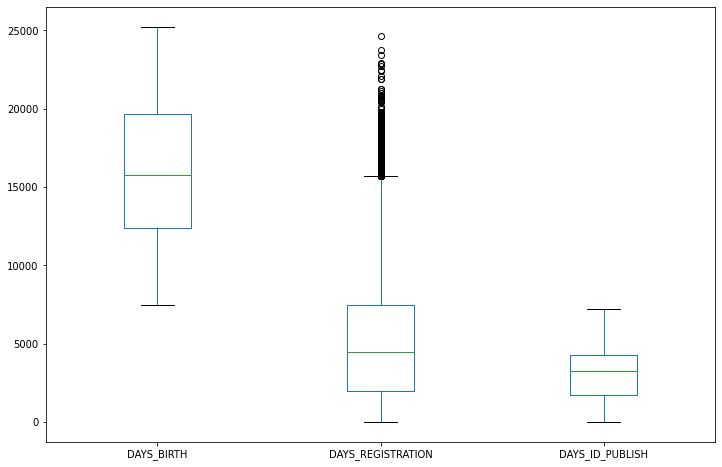

In [156]:
df_application_data = app_data2[["DAYS_BIRTH","DAYS_REGISTRATION","DAYS_ID_PUBLISH"]].copy()
df_application_data.plot(kind='box', figsize=(12,8))
plt.show()

**Outlier insights**

*   Column name: "DAYS_EMPLOYED"
*   Insight: The black circles (data points) beyond (Upper quartile + 1.5 * Inter-quartile-range are outliers)

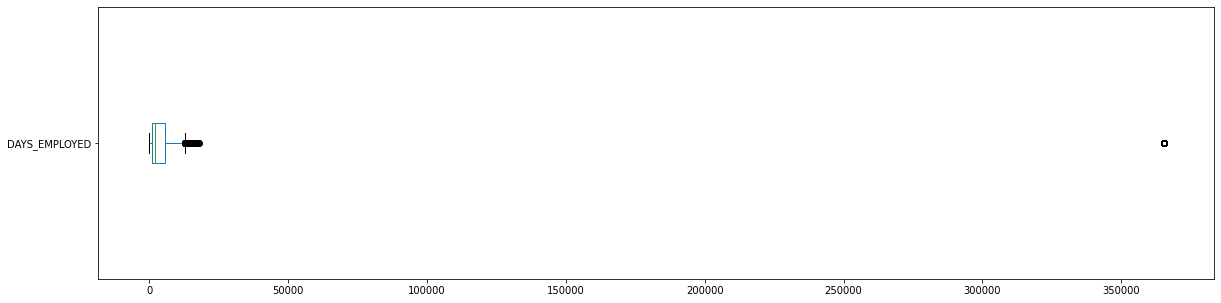

In [150]:
app_data2["DAYS_EMPLOYED"].plot(kind='box', figsize=(20,5), vert=False)
plt.show()


**Outlier insights**

*   Column name: "AMT_INCOME_TOTAL"
*   Insight: The black circles (data points) beyond (Upper quartile + 1.5 * Inter-quartile-range are outliers)

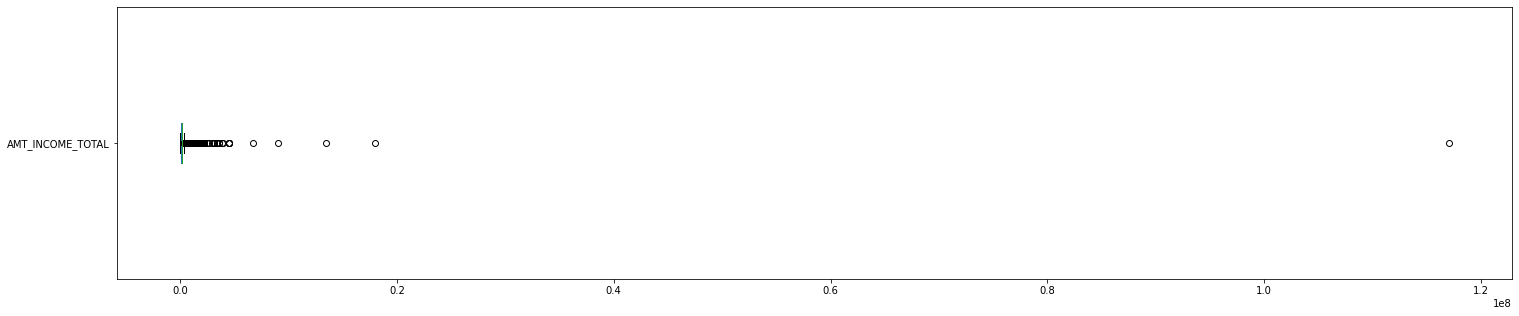

In [152]:
app_data2['AMT_INCOME_TOTAL'].plot(kind='box', figsize=(25,5), vert=False)
plt.show()

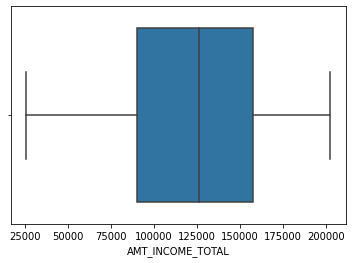

In [115]:
#Plotting AMT_INCOME_TOTAL post clipping outliers, to visualise box plot
sns.boxplot(x=app_data2['AMT_INCOME_TOTAL'].loc[app_data2['AMT_INCOME_TOTAL'] < 2.025000e+05])

**Outlier insights**

*   Column name: "AMT_ANNUITY"
*   Insight: The black circles (data points) beyond (Upper quartile + 1.5 * Inter-quartile-range are outliers)

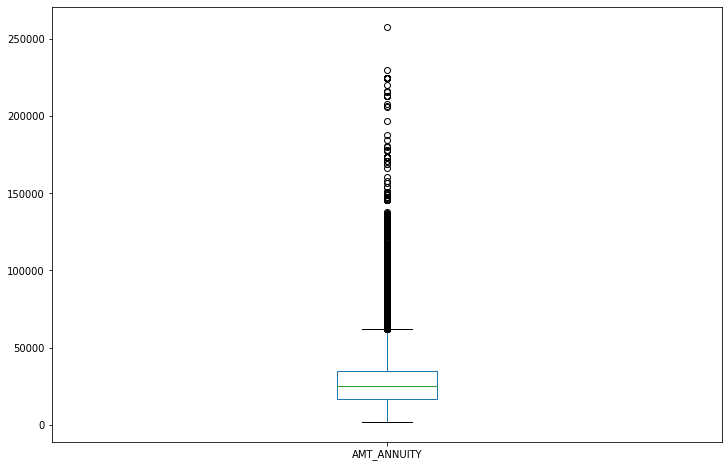

In [153]:
df_application_data = app_data2[["AMT_ANNUITY"]].copy()
df_application_data.plot(kind='box', figsize=(12,8))
plt.show()

# **Binning continous variable**

In [28]:
 print("CONVERTING DAYS_BIRTH INTO YEARS FOR BINNING")
 app_data2 ["AGE_YEARS"] = 0
 app_data2 ["AGE_YEARS"] = app_data2['DAYS_BIRTH'] / 365
 print(app_data2 [["AGE_YEARS",'DAYS_BIRTH']].head())
print("\n")
 print("CONVERTING DAYS_EMPLOYED INTO YEARS FOR BINNING")
 app_data2 ["EMPLOYED_YEARS"] = 0
 app_data2 ["EMPLOYED_YEARS"] = app_data2['DAYS_EMPLOYED'] / 365
 print(app_data2 [["EMPLOYED_YEARS",'DAYS_EMPLOYED']].head())


CONVERTING DAYS_BIRTH INTO YEARS FOR BINNING
   AGE_YEARS  DAYS_BIRTH
0  25.920548      9461.0
1  45.931507     16765.0
2  52.180822     19046.0
3  52.068493     19005.0
4  54.608219     19932.0


CONVERTING DAYS_EMPLOYED INTO YEARS FOR BINNING
   EMPLOYED_YEARS  DAYS_EMPLOYED
0        1.745205          637.0
1        3.254795         1188.0
2        0.616438          225.0
3        8.326027         3039.0
4        8.323288         3038.0


(array([13679., 33111., 38424., 41746., 40356., 34339., 33544., 32650.,
        27685., 11977.]),
 array([20.51780822, 25.37808219, 30.23835616, 35.09863014, 39.95890411,
        44.81917808, 49.67945205, 54.53972603, 59.4       , 64.26027397,
        69.12054795]),
 <a list of 10 Patch objects>)

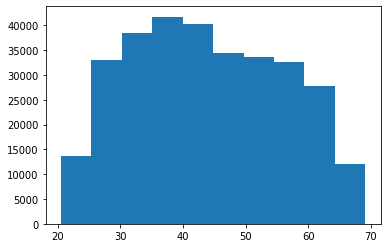

In [35]:
plt.hist(app_data2["AGE_YEARS"])

(array([1.34392e+05, 6.51880e+04, 2.79320e+04, 1.13820e+04, 6.56300e+03,
        3.38700e+03, 2.02700e+03, 9.55000e+02, 2.61000e+02, 5.00000e+01]),
 array([ 0.        ,  4.90739726,  9.81479452, 14.72219178, 19.62958904,
        24.5369863 , 29.44438356, 34.35178082, 39.25917808, 44.16657534,
        49.0739726 ]),
 <a list of 10 Patch objects>)

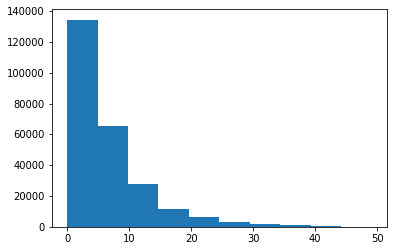

In [37]:
plt.hist(app_data2['EMPLOYED_YEARS'].loc[app_data2['EMPLOYED_YEARS'] < 100])
#Given no loan applicant has more than 100 years of employment history, removing outliers to eliminate any histogram distortion

(array([ 1465.,  7231., 18493., 32694., 40730., 12950., 41714., 31772.,
        29121.,  3462.]),
 array([ 25650. ,  43312.5,  60975. ,  78637.5,  96300. , 113962.5,
        131625. , 149287.5, 166950. , 184612.5, 202275. ]),
 <a list of 10 Patch objects>)

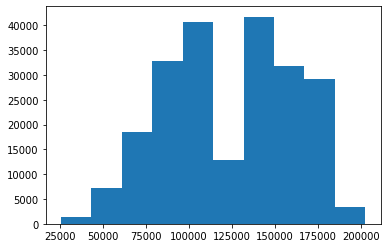

In [41]:
plt.hist(app_data2['AMT_INCOME_TOTAL'].loc[app_data2['AMT_INCOME_TOTAL'] < 2.025000e+05])

**Creating bins for AMT_INCOME_TOTAL based on interquartile range**

*   (AMT_INCOME_TOTAL < 80000) = LOW_INCOME
*   (AMT_INCOME_TOTAL >= 80000 AND AMT_INCOME_TOTAL < 160000) = MEDIAN_INCOME
*   (AMT_INCOME_TOTAL >= 160000 AND AMT_INCOME_TOTAL < 200000) = HIGH_INCOME
*   (AMT_INCOME_TOTAL >= 200000) = ULTRA_RICH







In [49]:
app_data2["INCOME_BINS"] = "UNKNOWN" #initialising
app_data2['INCOME_BINS'].loc[app_data2['AMT_INCOME_TOTAL'] < 80000] = "LOW_INCOME"
app_data2['INCOME_BINS'].loc[(app_data2['AMT_INCOME_TOTAL'] >= 80000) & (app_data2['AMT_INCOME_TOTAL'] < 160000)] = "MEDIAN_INCOME"
app_data2['INCOME_BINS'].loc[(app_data2['AMT_INCOME_TOTAL'] >= 160000) & (app_data2['AMT_INCOME_TOTAL'] < 200000)] = "HIGH_INCOME"
app_data2['INCOME_BINS'].loc[app_data2['AMT_INCOME_TOTAL'] > 200000] = "ULTRA_RICH"

#Bins for 'AMT_INCOME_TOTAL' column in column 'INCOME_BINS'

(array([ 87915.,      0.,      0.,  27363.,      0.,      0., 155764.,
             0.,      0.,  36469.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

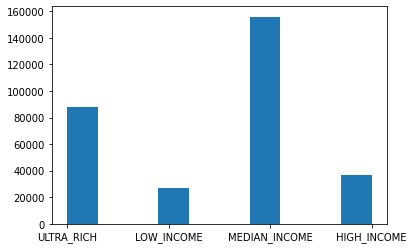

In [50]:
plt.hist(app_data2['INCOME_BINS'])

**Creating bins based on 'AGE_YEARS'**


*   (AGE_YEARS < 25) = GEN_Z
*   (AGE_YEARS >= 25 & AGE_YEARS < 30) = GEN_Y1
*   (AGE_YEARS >= 30 & AGE_YEARS < 40) = GEN_Y2
*   (AGE_YEARS >= 40 & AGE_YEARS < 55) = GEN_X
*   (AGE_YEARS >= 55) = BABY_BOOMERS







In [61]:
app_data2["AGE_BINS"] = "UNKNOWN" #initialising
app_data2['AGE_BINS'].loc[app_data2['AGE_YEARS'] < 25] = "GEN_Z"
app_data2['AGE_BINS'].loc[(app_data2['AGE_YEARS'] >= 25) & (app_data2['AGE_YEARS'] < 30)] = "GEN_Y1"
app_data2['AGE_BINS'].loc[(app_data2['AGE_YEARS'] >= 30) & (app_data2['AGE_YEARS'] < 40)] = "GEN_Y2"
app_data2['AGE_BINS'].loc[(app_data2['AGE_YEARS'] >= 40) & (app_data2['AGE_YEARS'] < 55)] = "GEN_X"
app_data2['AGE_BINS'].loc[app_data2['AGE_YEARS'] > 55] = "BABY_BOOMERS"

# Bins for 'AGE_YEARS' column in variable 'AGE_BINS'

No handles with labels found to put in legend.


(array([3.28500e+04, 0.00000e+00, 1.11485e+05, 0.00000e+00, 8.22990e+04,
        0.00000e+00, 6.86990e+04, 0.00000e+00, 1.21500e+04, 2.80000e+01]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 10 Patch objects>)

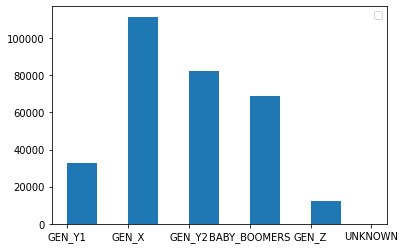

In [66]:
plt.hist(app_data2['AGE_BINS'])


# **Checking imbalance**

In [70]:
target_var_imbalance = app_data2.pivot_table(index='TARGET',values='SK_ID_CURR', aggfunc = 'count')
target_var_imbalance

,SK_ID_CURR
TARGET,
0,282686
1,24825


**Calculating imbalance**
Total records = 282686 + 24825 = 307511
0 in Target column occurs = 282686/307511 = 91.9%
1 in Target column occurs = 24825/307511 = 8.1%

**Insight: **Thus 'Target = 1' is minority class (loan defaulters, which is expected). **The level of imbalance is "moderate"** as minority class is in the rang of 1%-20%.

Imbalance degree estimation: https://developers.google.com/machine-learning/data-prep/construct/sampling-splitting/imbalanced-data



# **Divide the data into two sets, i.e. Target=1 and Target=0.**

**Creating dataframe: 'app_data_target1', with TARGET = 1**

In [77]:
app_data_target1 = app_data2.loc[app_data2["TARGET"] == 1]
app_data_target1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE_YEARS,EMPLOYED_YEARS,INCOME_BINS,AGE_BINS
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461.0,637.0,3648.0,2120.0,1,1,0,1,1,0,Laborers,1,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,0.9722,0.0833,0.9722,0.0833,0.9722,0.0833,0.0149,No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,25.920548,1.745205,ULTRA_RICH,GEN_Y1
26,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,27076.5,702000.0,Unaccompanied,Working,Secondary / secondary special,Widow,House / apartment,0.018029,18724.0,2628.0,6573.0,1827.0,1,1,0,1,0,0,Cooking staff,1,3,2,MONDAY,9,0,0,0,0,0,0,Business Entity Type 3,0.548477,0.190706,0.9732,0.0417,0.9732,0.0417,0.9732,0.0417,0.0085,Yes,10.0,1.0,10.0,0.0,-161.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.0,0.0,0.0,0.0,2.0,2.0,51.298630,7.200000,MEDIAN_INCOME,GEN_X
40,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,855000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.025164,17482.0,1262.0,1182.0,1029.0,1,1,0,1,0,0,Laborers,2,2,2,TUESDAY,9,0,0,0,0,0,0,Business Entity Type 3,0.306841,0.320163,0.9960,0.2500,0.9960,0.2500,0.9960,0.2500,0.1463,No,0.0,0.0,0.0,0.0,-1075.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,2.0,0.0,4.0,47.895890,3.457534,ULTRA_RICH,GEN_X
42,100049,1,Cash loans,F,N,N,0,135000.0,288873.0,16258.5,238500.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.007305,13384.0,3597.0,45.0,4409.0,1,1,1,1,1,0,Sales staff,2,3,3,THURSDAY,11,0,0,0,0,0,0,Self-employed,0.674203,0.399676,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,1.0,0.0,-1480.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0,36.668493,9.854795,MEDIAN_INCOME,GEN_Y2
81,100096,1,Cash loans,F,N,Y,0,81000.0,252000.0,14593.5,252000.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,0.028663,24794.0,365243.0,5391.0,4199.0,1,0,0,1,0,0,NaN,2,2,2,THURSDAY,10,0,0,0,0,0,0,XNA,0.023952,0.720944,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,67.928767,1000.665753,MEDIAN_INCOME,BABY_BOOMERS


**Creating dataframe: 'app_data_target0', with TARGET = 0**

In [124]:
app_data_target0 = app_data2.loc[app_data2["TARGET"] == 0]
app_data_target0.head(20)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE_YEARS,EMPLOYED_YEARS,INCOME_BINS,AGE_BINS
1,100003,0,Cash loans,F,N,N,0,270000.000,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765.0,1188.0,1186.0,291.0,1,1,0,1,1,0,Core staff,2,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,0.0714,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,45.931507,3.254795,ULTRA_RICH,GEN_X
2,100004,0,Revolving loans,M,Y,Y,0,67500.000,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046.0,225.0,4260.0,2531.0,1,1,1,1,1,0,Laborers,1,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,52.180822,0.616438,LOW_INCOME,GEN_X
3,100006,0,Cash loans,F,N,Y,0,135000.000,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005.0,3039.0,9833.0,2437.0,1,1,0,1,0,0,Laborers,2,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,52.068493,8.326027,MEDIAN_INCOME,GEN_X
4,100007,0,Cash loans,M,N,Y,0,121500.000,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932.0,3038.0,4311.0,3458.0,1,1,0,1,0,0,Core staff,1,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,54.608219,8.323288,MEDIAN_INCOME,GEN_X
5,100008,0,Cash loans,M,N,Y,0,99000.000,490495.5,27517.5,454500.0,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,0.035792,16941.0,1588.0,4970.0,477.0,1,1,1,1,1,0,Laborers,2,2,2,WEDNESDAY,16,0,0,0,0,0,0,Other,0.354225,0.621226,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-2536.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0,46.413699,4.350685,MEDIAN_INCOME,GEN_X
6,100009,0,Cash loans,F,Y,Y,1,171000.000,1560726.0,41301.0,1395000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.035792,13778.0,3130.0,1213.0,619.0,1,1,0,1,1,0,Accountants,3,2,2,SUNDAY,16,0,0,0,0,0,0,Business Entity Type 3,0.724000,0.492060,NaN,NaN,NaN,NaN,NaN,NaN,NaN

# **Univariate analysis for Gender distribution in defaulters vs non-defaulters**

             SK_ID_CURR
CODE_GENDER            
F                 14170
M                 10655
  CODE_GENDER  SK_ID_CURR  Percentage_distribution
0           F       14170                 0.570796
1           M       10655                 0.429204


[Text(0, 0, 'f'), Text(0, 0, 'm')]

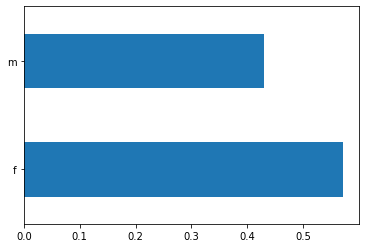

In [107]:
GENDER_WISE_DEFAULTERS = app_data_target1.pivot_table(index='CODE_GENDER',values='SK_ID_CURR', aggfunc = 'count')
#print(GENDER_WISE_DEFAULTERS)
GENDER_WISE_DEFAULTERS = pd.DataFrame(GENDER_WISE_DEFAULTERS.to_records())
GENDER_WISE_DEFAULTERS["Percentage_distribution"] = 0
GENDER_WISE_DEFAULTERS["Percentage_distribution"] = GENDER_WISE_DEFAULTERS["SK_ID_CURR"]/GENDER_WISE_DEFAULTERS["SK_ID_CURR"].sum()
print(GENDER_WISE_DEFAULTERS.head())
GENDER_WISE_DEFAULTERS["Percentage_distribution"].plot.barh().set_yticklabels(["f","m"])


  CODE_GENDER  SK_ID_CURR  Percentage_distribution
0           F      188278                 0.666032
1           M       94404                 0.333954
2         XNA           4                 0.000014


[Text(0, 0, 'f'), Text(0, 0, 'm')]

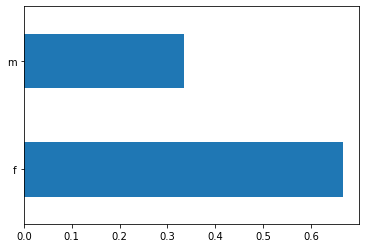

In [109]:
 GENDER_WISE_NONDEFAULTERS = app_data_target0.pivot_table(index='CODE_GENDER',values='SK_ID_CURR', aggfunc = 'count')
#print(GENDER_WISE_DEFAULTERS)
GENDER_WISE_NONDEFAULTERS = pd.DataFrame(GENDER_WISE_NONDEFAULTERS.to_records())
GENDER_WISE_NONDEFAULTERS["Percentage_distribution"] = 0
GENDER_WISE_NONDEFAULTERS["Percentage_distribution"] = GENDER_WISE_NONDEFAULTERS["SK_ID_CURR"]/GENDER_WISE_NONDEFAULTERS["SK_ID_CURR"].sum()
print(GENDER_WISE_NONDEFAULTERS.head())
GENDER_WISE_NONDEFAULTERS = GENDER_WISE_NONDEFAULTERS.loc[GENDER_WISE_NONDEFAULTERS["CODE_GENDER"] != "XNA"]
GENDER_WISE_NONDEFAULTERS["Percentage_distribution"].plot.barh().set_yticklabels(["f","m"])

**Insight from univariate analysis and comparison of gender column between TARGET=0 versus TARGET=1 dataframes:**


*   **Observation:** Females have higher concentration in non-loan-defaulters (66%) than in loan defaulters (57%).
*   **Insight:** Thus, Females are less likely to default than Males.
*   **Business application:** If all other parameters are same for 2 participants, interest rate charged to female loan applicant should be lower than male applicant, inline with default risk





# **Univariate analysis for "OCCUPATION_TYPE" distribution in defaulters vs non-defaulters**

          OCCUPATION_TYPE  SK_ID_CURR  Percentage_distribution
0             Accountants         474                 0.025557
1          Cleaning staff         447                 0.024101
2           Cooking staff         621                 0.033483
3              Core staff        1738                 0.093708
4                 Drivers        2107                 0.113603
5                HR staff          36                 0.001941
6   High skill tech staff         701                 0.037796
7                IT staff          34                 0.001833
8                Laborers        5838                 0.314768
9      Low-skill Laborers         359                 0.019356
10               Managers        1328                 0.071602
11         Medicine staff         572                 0.030841
12  Private service staff         175                 0.009435
13          Realty agents          59                 0.003181
14            Sales staff        3092                 0

[Text(0, 0, 'Accountants'),
 Text(0, 0, 'Cleaner'),
 Text(0, 0, 'Cook'),
 Text(0, 0, 'CoreStaff'),
 Text(0, 0, 'Driver'),
 Text(0, 0, 'HR'),
 Text(0, 0, 'HighSkillTech'),
 Text(0, 0, 'IT'),
 Text(0, 0, 'Laborer'),
 Text(0, 0, 'LowSkillLaborer'),
 Text(0, 0, 'Manager'),
 Text(0, 0, 'Medical'),
 Text(0, 0, 'PrivateService'),
 Text(0, 0, 'RealtyAgent'),
 Text(0, 0, 'Sales'),
 Text(0, 0, 'Secretary'),
 Text(0, 0, 'Security'),
 Text(0, 0, 'Waiter/barmen')]

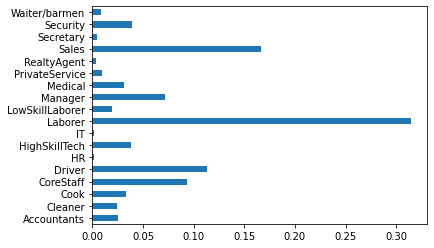

In [114]:
OCCUPATION_WISE_DEFAULTERS = app_data_target1.pivot_table(index='OCCUPATION_TYPE',values='SK_ID_CURR', aggfunc = 'count')
OCCUPATION_WISE_DEFAULTERS = pd.DataFrame(OCCUPATION_WISE_DEFAULTERS.to_records())
OCCUPATION_WISE_DEFAULTERS["Percentage_distribution"] = 0
OCCUPATION_WISE_DEFAULTERS["Percentage_distribution"] = OCCUPATION_WISE_DEFAULTERS["SK_ID_CURR"]/OCCUPATION_WISE_DEFAULTERS["SK_ID_CURR"].sum()
print(OCCUPATION_WISE_DEFAULTERS.head(20))
ylabels = ["Accountants","Cleaner","Cook","CoreStaff","Driver","HR","HighSkillTech","IT","Laborer","LowSkillLaborer"
,"Manager","Medical","PrivateService","RealtyAgent","Sales","Secretary","Security","Waiter/barmen"]
OCCUPATION_WISE_DEFAULTERS["Percentage_distribution"].plot.barh().set_yticklabels(ylabels)


          OCCUPATION_TYPE  SK_ID_CURR  Percentage_distribution
0             Accountants        9339                 0.048496
1          Cleaning staff        4206                 0.021841
2           Cooking staff        5325                 0.027652
3              Core staff       25832                 0.134141
4                 Drivers       16496                 0.085661
5                HR staff         527                 0.002737
6   High skill tech staff       10679                 0.055454
7                IT staff         492                 0.002555
8                Laborers       49348                 0.256256
9      Low-skill Laborers        1734                 0.009004
10               Managers       20043                 0.104080
11         Medicine staff        7965                 0.041361
12  Private service staff        2477                 0.012863
13          Realty agents         692                 0.003593
14            Sales staff       29010                 0

[Text(0, 0, 'Accountants'),
 Text(0, 0, 'Cleaner'),
 Text(0, 0, 'Cook'),
 Text(0, 0, 'CoreStaff'),
 Text(0, 0, 'Driver'),
 Text(0, 0, 'HR'),
 Text(0, 0, 'HighSkillTech'),
 Text(0, 0, 'IT'),
 Text(0, 0, 'Laborer'),
 Text(0, 0, 'LowSkillLaborer'),
 Text(0, 0, 'Manager'),
 Text(0, 0, 'Medical'),
 Text(0, 0, 'PrivateService'),
 Text(0, 0, 'RealtyAgent'),
 Text(0, 0, 'Sales'),
 Text(0, 0, 'Secretary'),
 Text(0, 0, 'Security'),
 Text(0, 0, 'Waiter/barmen')]

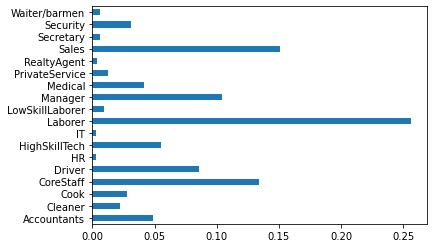

In [116]:
OCCUPATION_WISE_NONDEFAULTERS = app_data_target0.pivot_table(index='OCCUPATION_TYPE',values='SK_ID_CURR', aggfunc = 'count')
OCCUPATION_WISE_NONDEFAULTERS = pd.DataFrame(OCCUPATION_WISE_NONDEFAULTERS.to_records())
OCCUPATION_WISE_NONDEFAULTERS["Percentage_distribution"] = 0
OCCUPATION_WISE_NONDEFAULTERS["Percentage_distribution"] = OCCUPATION_WISE_NONDEFAULTERS["SK_ID_CURR"]/OCCUPATION_WISE_NONDEFAULTERS["SK_ID_CURR"].sum()
print(OCCUPATION_WISE_NONDEFAULTERS.head(20))
ylabels = ["Accountants","Cleaner","Cook","CoreStaff","Driver","HR","HighSkillTech","IT","Laborer","LowSkillLaborer"
,"Manager","Medical","PrivateService","RealtyAgent","Sales","Secretary","Security","Waiter/barmen"]
OCCUPATION_WISE_NONDEFAULTERS["Percentage_distribution"].plot.barh().set_yticklabels(ylabels)

**Insight from univariate analysis and comparison of "OCCUPATION_TYPE" column between TARGET=0 versus TARGET=1 dataframes:**


**Observations:**  
*   Laborer category has higher concentration (31%) in loan defaulters versus in non-defaulters (25%).
*  Other occupation types having high concentration in loan defaulters: Sales, Cleaning/cooking staff, drivers, low-skill labor, security and waiter/barmen
*  Occupation types having high concentration in non-loan defaulters: Private service staff, High skill tech staff, Accountants, Core staff, HR, IT, Manager, Medicine staff, secretary 

**Insight:** 
*  A person's occupation has an impact on loan payback capabilities of the person. 
*  People working in stable/skilled professions are less likely to default.
*  People working in laborer/manual/low-skilled professions are more likely to default.

**Business application:** The interest rate for applicants in stable/skilled professions should be lower than the applicants in laborer/manual/low-skilled professions (all other factors being the same).

# **Univariate analysis for "INCOME_BINS" distribution in defaulters vs non-defaulters**

In [118]:
INCOME_WISE_DEFAULTERS = app_data_target1.pivot_table(index='INCOME_BINS',values='SK_ID_CURR', aggfunc = 'count')
INCOME_WISE_DEFAULTERS = pd.DataFrame(INCOME_WISE_DEFAULTERS.to_records())
INCOME_WISE_DEFAULTERS["Percentage_distribution"] = 0
INCOME_WISE_DEFAULTERS["Percentage_distribution"] = INCOME_WISE_DEFAULTERS["SK_ID_CURR"]/INCOME_WISE_DEFAULTERS["SK_ID_CURR"].sum()
print(INCOME_WISE_DEFAULTERS.head(20))

     INCOME_BINS  SK_ID_CURR  Percentage_distribution
0    HIGH_INCOME        3014                 0.121410
1     LOW_INCOME        2169                 0.087372
2  MEDIAN_INCOME       13368                 0.538489
3     ULTRA_RICH        6274                 0.252729


In [119]:
INCOME_WISE_NONDEFAULTERS = app_data_target0.pivot_table(index='INCOME_BINS',values='SK_ID_CURR', aggfunc = 'count')
INCOME_WISE_NONDEFAULTERS = pd.DataFrame(INCOME_WISE_NONDEFAULTERS.to_records())
INCOME_WISE_NONDEFAULTERS["Percentage_distribution"] = 0
INCOME_WISE_NONDEFAULTERS["Percentage_distribution"] = INCOME_WISE_NONDEFAULTERS["SK_ID_CURR"]/INCOME_WISE_NONDEFAULTERS["SK_ID_CURR"].sum()
print(INCOME_WISE_NONDEFAULTERS.head(20))

     INCOME_BINS  SK_ID_CURR  Percentage_distribution
0    HIGH_INCOME       33455                 0.118347
1     LOW_INCOME       25194                 0.089124
2  MEDIAN_INCOME      142396                 0.503725
3     ULTRA_RICH       81641                 0.288805


**Insight from univariate analysis and comparison of "INCOME_BINS" column between TARGET=0 versus TARGET=1 dataframes:**


**Observations:**  
*   Loan applicants in ULTRA_RICH bin (INCOME > 200k) have lower concentration in defaulters versus non-defaulters.
*   Loan applicants in all other income categories do not show a clear trend between defaulters vs non-defaulters.

**Insight:** 
*  A person's income is not the only determining factor for his/her loan repayment capability.
*  Other factors like existing loans, loan amount, gender etc. should be considered in combination with income for better estimation of loan repayment capability.

**Business application:** The interest rate for applicants having income greater than 200k should be lower than the applicants in all other income categories (everything else being the same).

# **Univariate analysis for "LOAN_TYPE/NAME_CONTRACT_TYPE" distribution in defaulters vs non-defaulters**

In [120]:
LOANTYPE_WISE_DEFAULTERS = app_data_target1.pivot_table(index='NAME_CONTRACT_TYPE',values='SK_ID_CURR', aggfunc = 'count')
LOANTYPE_WISE_DEFAULTERS = pd.DataFrame(LOANTYPE_WISE_DEFAULTERS.to_records())
LOANTYPE_WISE_DEFAULTERS["Percentage_distribution"] = 0
LOANTYPE_WISE_DEFAULTERS["Percentage_distribution"] = LOANTYPE_WISE_DEFAULTERS["SK_ID_CURR"]/LOANTYPE_WISE_DEFAULTERS["SK_ID_CURR"].sum()
print(LOANTYPE_WISE_DEFAULTERS.head(20))

  NAME_CONTRACT_TYPE  SK_ID_CURR  Percentage_distribution
0         Cash loans       23221                 0.935388
1    Revolving loans        1604                 0.064612


In [121]:
LOANTYPE_WISE_NONDEFAULTERS = app_data_target0.pivot_table(index='NAME_CONTRACT_TYPE',values='SK_ID_CURR', aggfunc = 'count')
LOANTYPE_WISE_NONDEFAULTERS = pd.DataFrame(LOANTYPE_WISE_NONDEFAULTERS.to_records())
LOANTYPE_WISE_NONDEFAULTERS["Percentage_distribution"] = 0
LOANTYPE_WISE_NONDEFAULTERS["Percentage_distribution"] = LOANTYPE_WISE_NONDEFAULTERS["SK_ID_CURR"]/LOANTYPE_WISE_NONDEFAULTERS["SK_ID_CURR"].sum()
print(LOANTYPE_WISE_NONDEFAULTERS.head(20))

  NAME_CONTRACT_TYPE  SK_ID_CURR  Percentage_distribution
0         Cash loans      255011                   0.9021
1    Revolving loans       27675                   0.0979


**Insight from univariate analysis and comparison of "NAME_CONTRACT_TYPE" column between TARGET=0 versus TARGET=1 dataframes:**


**Observations:**  
*   Cash loans has higher default rate than revolving loans

**Business application:** The default interest rate for cash loans should be higher than revolving loans for the same amount, to adjust for risk exposure

# **Univariate analysis for "NAME_EDUCATION_TYPE" distribution in defaulters vs non-defaulters**

In [122]:
EDUCATION_WISE_DEFAULTERS = app_data_target1.pivot_table(index='NAME_EDUCATION_TYPE',values='SK_ID_CURR', aggfunc = 'count')
EDUCATION_WISE_DEFAULTERS = pd.DataFrame(EDUCATION_WISE_DEFAULTERS.to_records())
EDUCATION_WISE_DEFAULTERS["Percentage_distribution"] = 0
EDUCATION_WISE_DEFAULTERS["Percentage_distribution"] = EDUCATION_WISE_DEFAULTERS["SK_ID_CURR"]/EDUCATION_WISE_DEFAULTERS["SK_ID_CURR"].sum()
print(EDUCATION_WISE_DEFAULTERS.head(20))

             NAME_EDUCATION_TYPE  SK_ID_CURR  Percentage_distribution
0                Academic degree           3                 0.000121
1               Higher education        4009                 0.161490
2              Incomplete higher         872                 0.035126
3                Lower secondary         417                 0.016798
4  Secondary / secondary special       19524                 0.786465


In [123]:
EDUCATION_WISE_NONDEFAULTERS = app_data_target0.pivot_table(index='NAME_EDUCATION_TYPE',values='SK_ID_CURR', aggfunc = 'count')
EDUCATION_WISE_NONDEFAULTERS = pd.DataFrame(EDUCATION_WISE_NONDEFAULTERS.to_records())
EDUCATION_WISE_NONDEFAULTERS["Percentage_distribution"] = 0
EDUCATION_WISE_NONDEFAULTERS["Percentage_distribution"] = EDUCATION_WISE_NONDEFAULTERS["SK_ID_CURR"]/EDUCATION_WISE_NONDEFAULTERS["SK_ID_CURR"].sum()
print(EDUCATION_WISE_NONDEFAULTERS.head(20))

             NAME_EDUCATION_TYPE  SK_ID_CURR  Percentage_distribution
0                Academic degree         161                 0.000570
1               Higher education       70854                 0.250646
2              Incomplete higher        9405                 0.033270
3                Lower secondary        3399                 0.012024
4  Secondary / secondary special      198867                 0.703491


**Insight from univariate analysis and comparison of "EDUCATION_TYPE" column between TARGET=0 versus TARGET=1 dataframes:**


**Observations:**  
*   Loan applicants with 'HIGHER EDUCATION' and 'ACADEMIC DEGREE' have higher concentration in non-defaulters.
*   Loan applicants with 'Secondary/Secondary special' education have higher concentration in defaulters.

**Insight:** 
*  A person's education level is a good predictor or loan default likelihood.
*  Higher is the education lower is the risk of default.

**Business application:** The interest rate for applicants with higher education should be lower than the applicants with lower education level (to balance risk-reward ratio).

# **Univariate analysis for "FLAG_OWN_CAR" distribution in defaulters vs non-defaulters**

In [127]:
OWNCAR_WISE_DEFAULTERS = app_data_target1.pivot_table(index='FLAG_OWN_CAR',values='SK_ID_CURR', aggfunc = 'count')
OWNCAR_WISE_DEFAULTERS = pd.DataFrame(OWNCAR_WISE_DEFAULTERS.to_records())
OWNCAR_WISE_DEFAULTERS["Percentage_distribution"] = 0
OWNCAR_WISE_DEFAULTERS["Percentage_distribution"] = OWNCAR_WISE_DEFAULTERS["SK_ID_CURR"]/OWNCAR_WISE_DEFAULTERS["SK_ID_CURR"].sum()
print(OWNCAR_WISE_DEFAULTERS.head(20))

  FLAG_OWN_CAR  SK_ID_CURR  Percentage_distribution
0            N       17249                 0.694824
1            Y        7576                 0.305176


In [129]:
OWNCAR_WISE_NONDEFAULTERS = app_data_target0.pivot_table(index='FLAG_OWN_CAR',values='SK_ID_CURR', aggfunc = 'count')
OWNCAR_WISE_NONDEFAULTERS = pd.DataFrame(OWNCAR_WISE_NONDEFAULTERS.to_records())
OWNCAR_WISE_NONDEFAULTERS["Percentage_distribution"] = 0
OWNCAR_WISE_NONDEFAULTERS["Percentage_distribution"] = OWNCAR_WISE_NONDEFAULTERS["SK_ID_CURR"]/OWNCAR_WISE_NONDEFAULTERS["SK_ID_CURR"].sum()
print(OWNCAR_WISE_NONDEFAULTERS.head(20))

  FLAG_OWN_CAR  SK_ID_CURR  Percentage_distribution
0            N      185675                 0.656824
1            Y       97011                 0.343176


**Insight from univariate analysis and comparison of "FLAG_OWN_CAR" column between TARGET=0 versus TARGET=1 dataframes:**


**Observations/insights:**  
*   Loan applicants who own a car are less likely to default than applicants who don't own a car.

**Business application:** The interest rate for applicants having a car can be lower than the applicants without it(to balance risk-reward ratio).

# **Correlation of numerical columns with target variable**

In [130]:
app_data_target1.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                      float64
DAYS_EMPLOYED                   float64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                 float64
FLAG_MOBIL                       object
FLAG_EMP_PHONE                   object
FLAG_WORK_PHONE                  object
FLAG_CONT_MOBILE                 object


In [143]:
app_data_target1_numeric = app_data_target1[["CNT_CHILDREN","AMT_INCOME_TOTAL","AMT_CREDIT","AMT_ANNUITY","AMT_GOODS_PRICE","AGE_YEARS","EMPLOYED_YEARS"
,"REGION_POPULATION_RELATIVE","DAYS_BIRTH","DAYS_EMPLOYED","DAYS_REGISTRATION","DAYS_ID_PUBLISH","EXT_SOURCE_2","EXT_SOURCE_3","YEARS_BEGINEXPLUATATION_AVG"
,"FLOORSMAX_AVG","YEARS_BEGINEXPLUATATION_MODE","FLOORSMAX_MODE","YEARS_BEGINEXPLUATATION_MEDI","FLOORSMAX_MEDI","TOTALAREA_MODE"
,"OBS_30_CNT_SOCIAL_CIRCLE","DEF_30_CNT_SOCIAL_CIRCLE","OBS_60_CNT_SOCIAL_CIRCLE","DEF_60_CNT_SOCIAL_CIRCLE","DAYS_LAST_PHONE_CHANGE"
,"EXT_SOURCE_2","EXT_SOURCE_3","YEARS_BEGINEXPLUATATION_AVG","FLOORSMAX_AVG","YEARS_BEGINEXPLUATATION_MODE","FLOORSMAX_MODE","YEARS_BEGINEXPLUATATION_MEDI"
,"FLOORSMAX_MEDI","TOTALAREA_MODE"]].copy()

app_data_target0_numeric = app_data_target0[["CNT_CHILDREN","AMT_INCOME_TOTAL","AMT_CREDIT","AMT_ANNUITY","AMT_GOODS_PRICE","AGE_YEARS","EMPLOYED_YEARS"
,"REGION_POPULATION_RELATIVE","DAYS_BIRTH","DAYS_EMPLOYED","DAYS_REGISTRATION","DAYS_ID_PUBLISH","EXT_SOURCE_2","EXT_SOURCE_3","YEARS_BEGINEXPLUATATION_AVG"
,"FLOORSMAX_AVG","YEARS_BEGINEXPLUATATION_MODE","FLOORSMAX_MODE","YEARS_BEGINEXPLUATATION_MEDI","FLOORSMAX_MEDI","TOTALAREA_MODE"
,"OBS_30_CNT_SOCIAL_CIRCLE","DEF_30_CNT_SOCIAL_CIRCLE","OBS_60_CNT_SOCIAL_CIRCLE","DEF_60_CNT_SOCIAL_CIRCLE","DAYS_LAST_PHONE_CHANGE"
,"EXT_SOURCE_2","EXT_SOURCE_3","YEARS_BEGINEXPLUATATION_AVG","FLOORSMAX_AVG","YEARS_BEGINEXPLUATATION_MODE","FLOORSMAX_MODE","YEARS_BEGINEXPLUATATION_MEDI"
,"FLOORSMAX_MEDI","TOTALAREA_MODE"]].copy()

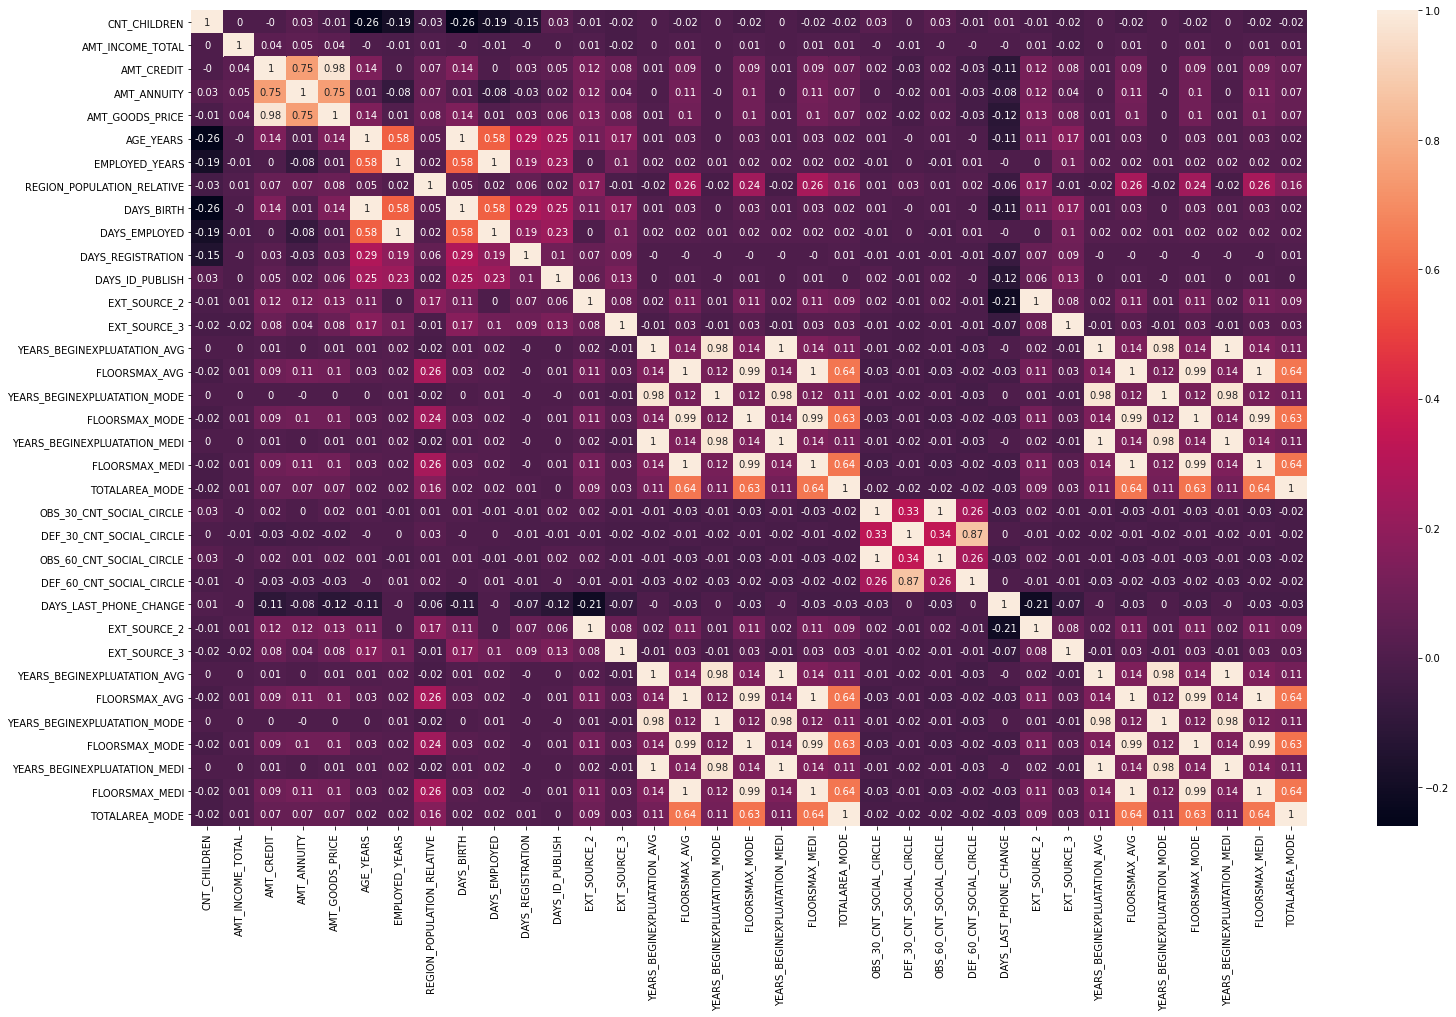

In [148]:
import seaborn as sns

correlation_matrix = app_data_target1_numeric.corr().round(2)
fig, ax = plt.subplots(figsize=(25,15))
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True, ax=ax)

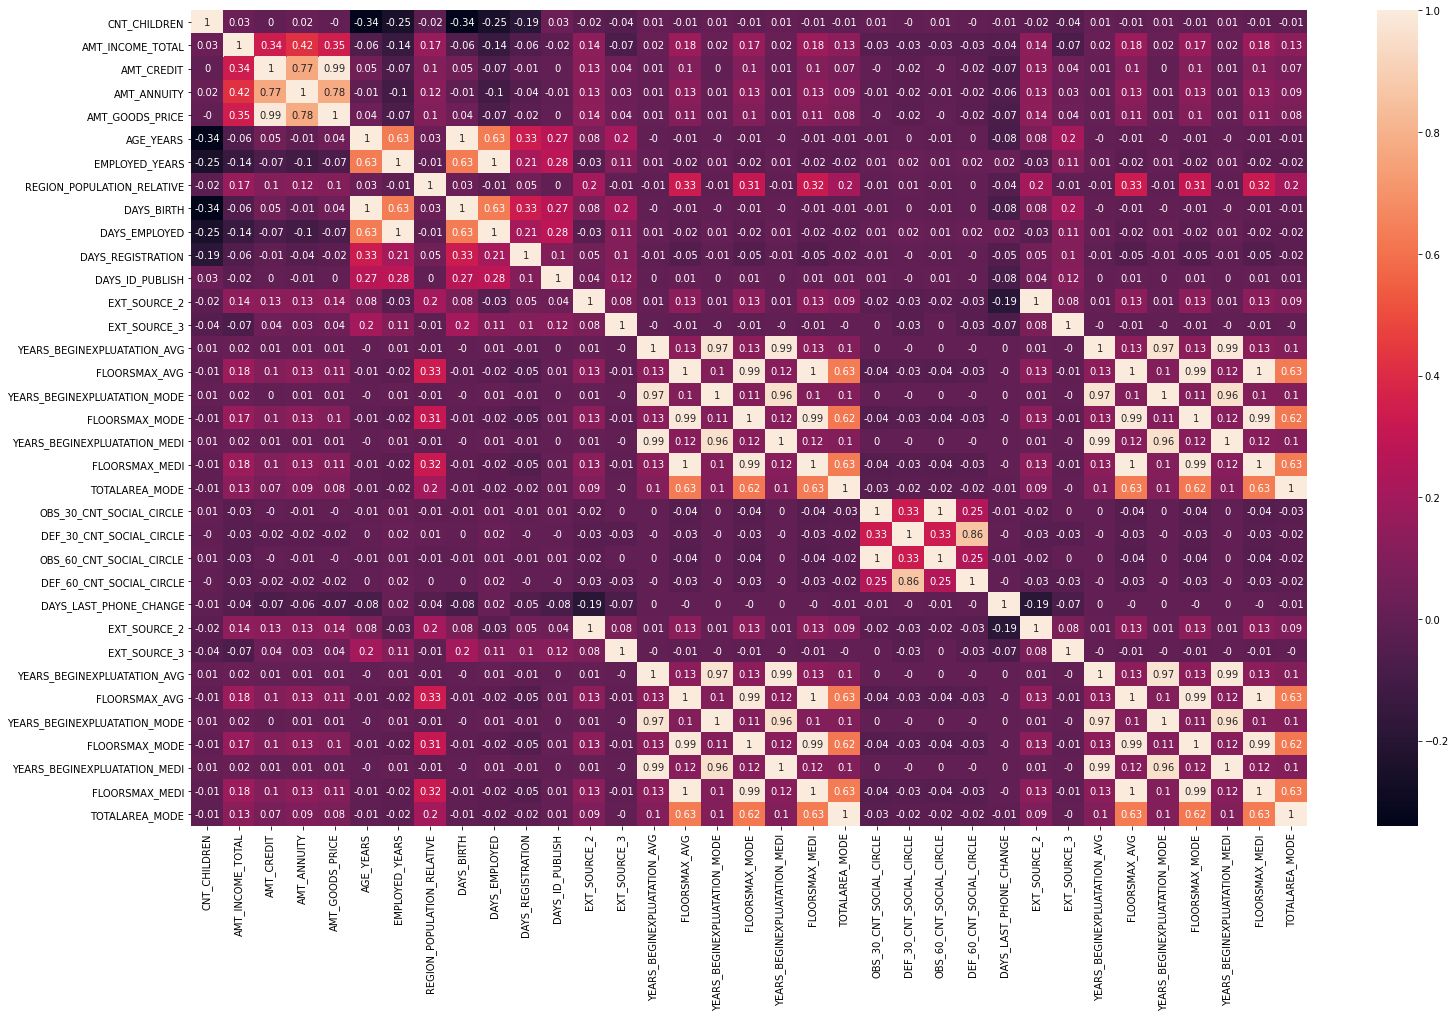

In [149]:
correlation_matrix = app_data_target0_numeric.corr().round(2)
fig, ax = plt.subplots(figsize=(25,15))
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True, ax=ax)

# **Variables with highest correlation are SAME for both target types.**

**Insights from correlation analysis of numerical features:**

*   **The numerical variables have same correlation sign in both the target types (loan defaulters vs non-defaulters.**
*   **The numerical variables have similar correlation magnitude in both the target types (loan defaulters vs non-defaulters.**
*   **The reason why correlation signs are same and magnitudes are also similar because the relationship between variables remains mostly same across 2 Target types.**



# **Univariate analysis on continuos variable between Targets (defaulters vs non-defaulters)**

**Comparing mean/median of continous variable for defaulters vs non-defaulters**

In [151]:
app_data_target1_numeric.describe().apply(lambda s: s.apply(lambda x: format(x, 'g')))

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,AGE_YEARS,EMPLOYED_YEARS,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE
count,24825,24825,24825,24825,24804,24825,24825,24825,24825,24825,24825,24825,24773,19148,11017,10761,11017,10761,11017,10761,11119,24789,24789,24789,24789,24825,24773,19148,11017,10761,11017,10761,11017,10761,11119
mean,0.463807,165612,557779,26481.7,488972,40.7804,124.897,0.0191306,14884.8,45587.3,4487.13,2732.1,0.410935,0.390717,0.975634,0.203021,0.974938,0.199612,0.97557,0.202692,0.0897689,1.49615,0.19198,1.47767,0.138247,-808.797,0.410935,0.390717,0.975634,0.203021,0.974938,0.199612,0.97557,0.202692,0.0897689
std,0.756903,746677,346433,12450.7,311636,11.4872,324.119,0.0119045,4192.84,118303,3299.65,1516.98,0.213107,0.20581,0.0691479,0.134414,0.0738489,0.133548,0.0701138,0.134705,0.0985296,2.37844,0.516524,2.35591,0.427645,758.091,0.213107,0.20581,0.0691479,0.134414,0.0738489,0.133548,0.0701138,0.134705,0.0985296
min,0,25650,45000,2722.5,45000,21.0356,0,0.000533,7678,0,0,0,5.00211e-06,0.000527265,0,0,0,0,0,0,0,0,0,0,0,-4070,5.00211e-06,0.000527265,0,0,0,0,0,0,0
25%,0,112500,284400,17361,238500,31.2219,1.85479,0.00963,11396,677,1671,1392,0.238568,0.223831,0.9762,0.125,0.9757,0.125,0.9757,0.125,0.0316,0,0,0,0,-1301,0.238568,0.223831,0.9762,0.125,0.9757,0.125,0.9757,0.125,0.0316
50%,0,135000,497520,25263,450000,39.1288,3.99452,0.018634,14282,1458,4056,2797,0.440381,0.3791,0.9811,0.1667,0.9806,0.1667,0.9811,0.1667,0.0617,0,0,0,0,-594,0.440381,0.3791,0.9811,0.1667,0.9806,0.1667,0.9811,0.1667,0.0617
75%,1,202500,733316,32976,675000,49.4164,8.9863,0.025164,18037,3280,6646,4119,0.59419,0.553165,0.9861,0.3333,0.9861,0.3333,0.9861,0.3333,0.1084,2,0,2,0,-194,0.59419,0.553165,0.9861,0.3333,0.9861,0.3333,0.9861,0.3333,0.1084
max,11,1.17e+08,4.02768e+06,149211,3.6e+06,68.9534,1000.67,0.072508,25168,365243,22928,6207,0.81187,0.89601,1,1,1,1,1,1,1,30,6,29,5,0,0.81187,0.89601,1,1,1,1,1,1,1


In [152]:
app_data_target0_numeric.describe().apply(lambda s: s.apply(lambda x: format(x, 'g')))

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,AGE_YEARS,EMPLOYED_YEARS,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE
count,282686,282686,282686,282674,282429,282686,282686,282686,282686,282686,282686,282686,282078,227398,146487,143730,146487,143730,146487,143730,147961,281701,281701,281701,281701,282685,282078,227398,146487,143730,146487,143730,146487,143730,147961
mean,0.412946,169078,602648,27163.6,542737,44.2142,190.873,0.0210207,16138.2,69668.8,5029.94,3017.22,0.523479,0.520969,0.977893,0.228023,0.977225,0.224015,0.977916,0.227634,0.103507,1.41574,0.139148,1.39892,0.0966876,-976.388,0.523479,0.520969,0.977893,0.228023,0.977225,0.224015,0.977916,0.227634,0.103507
std,0.718843,110476,406846,14658.3,373785,11.9567,386.256,0.0139775,4364.2,140983,3538.46,1506.61,0.186277,0.190465,0.058406,0.145228,0.063821,0.144298,0.0590546,0.145665,0.108043,2.40286,0.439768,2.38179,0.355771,831.211,0.186277,0.190465,0.058406,0.145228,0.063821,0.144298,0.0590546,0.145665,0.108043
min,0,25650,45000,1615.5,40500,20.5178,0,0.00029,7489,0,0,0,8.17362e-08,0.000527265,0,0,0,0,0,0,0,0,0,0,0,-4292,8.17362e-08,0.000527265,0,0,0,0,0,0,0
25%,0,112500,270000,16456.5,238500,34.3452,2.64932,0.010006,12536,967,2045,1755,0.409787,0.385915,0.9767,0.1667,0.9767,0.1667,0.9767,0.1667,0.0417,0,0,0,0,-1586,0.409787,0.385915,0.9767,0.1667,0.9767,0.1667,0.9767,0.1667,0.0417
50%,0,148500,517788,24876,450000,43.4986,6.31233,0.01885,15877,2304,4544,3295,0.573905,0.546023,0.9821,0.1667,0.9816,0.1667,0.9821,0.1667,0.0691,0,0,0,0,-776,0.573905,0.546023,0.9821,0.1667,0.9816,0.1667,0.9821,0.1667,0.0691
75%,1,202500,810000,34749,688500,54.2295,16.6411,0.028663,19793.8,6074,7550,4313,0.667705,0.67383,0.9866,0.3333,0.9866,0.3333,0.9866,0.3333,0.1295,2,0,2,0,-281,0.667705,0.67383,0.9866,0.3333,0.9866,0.3333,0.9866,0.3333,0.1295
max,19,1.80001e+07,4.05e+06,258026,4.05e+06,69.1205,1000.67,0.072508,25229,365243,24672,7197,0.855,0.893976,1,1,1,1,1,1,1,348,34,344,24,0,0.855,0.893976,1,1,1,1,1,1,1


**Analysis insights:**

* **AMT_INCOME_TOTAL:**  Median income of non-defaulters is 148.5k vs 135k for defaulters, thus non-defaulters generally have higher income than defaulters.
* **AGE_YEARS:**  Non-defaulters have generally higher age (median age=43.5 years) than defaulters (median age=39.1 years)
* **EMPLOYED_YEARS:**  Non-defaulters have higher (median=6.3 years) employment tenure than defaulters (median employment tenure = 4 years).
* **DAYS_REGISTRATION , DAYS_ID_PUBLISH , EXT_SOURCE_2,EXT_SOURCE_3:** Non-defaulters have higher median values for these 2 columns than defaulters.



# **Bivariate analysis for numerical variables**

In [ ]:
plt.figure(figsize=(16,12))
plt.xticks(rotation=90)
plt.yscale('log')
sns.boxplot(data =app_data2, x='AMT_CREDIT',hue='TARGET',y='AMT_ANNUITY',orient='v')
plt.title('Prev Credit amount vs Annuity Amount')
plt.show()